In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import plotly.express as px
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

sns.set_theme(style="dark")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = pd.read_pickle('cleaned_data.pkl')

In [3]:
data.columns

Index(['my_win', 'match_id', 'barracks_status_dire', 'barracks_status_radiant',
       'cluster', 'dire_score', 'duration', 'first_blood_time', 'game_mode',
       'lobby_type', 'picks_bans', 'radiant_score', 'start_time',
       'tower_status_dire', 'tower_status_radiant', 'players', 'patch',
       'region', 'player_slot', 'hero', 'abandons', 'assists', 'backpack_0',
       'backpack_1', 'backpack_2', 'benchmarks.gold_per_min.pct',
       'benchmarks.gold_per_min.raw', 'benchmarks.hero_damage_per_min.pct',
       'benchmarks.hero_damage_per_min.raw',
       'benchmarks.hero_healing_per_min.pct',
       'benchmarks.hero_healing_per_min.raw', 'benchmarks.kills_per_min.pct',
       'benchmarks.kills_per_min.raw', 'benchmarks.last_hits_per_min.pct',
       'benchmarks.last_hits_per_min.raw', 'benchmarks.stuns_per_min.pct',
       'benchmarks.stuns_per_min.raw', 'benchmarks.xp_per_min.pct',
       'benchmarks.xp_per_min.raw', 'deaths', 'denies', 'gold_per_min',
       'hero_id', 'isRadian

In [4]:
x = data[data.columns.difference(['my_win', 'match_id', 'cluster', 'picks_bans', 'start_time', 'players', 'hero', 'kda'])]

In [5]:
x.head()

,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support,abandons,agi_gain,assists,attack_point,attack_range,attack_rate,attack_type_encoded,backpack_0,backpack_1,backpack_2,barracks_status_dire,barracks_status_radiant,base_agi,base_armor,base_attack_max,base_attack_min,base_attack_time,base_health_regen,base_int,base_mana,base_mana_regen,base_str,benchmarks.gold_per_min.pct,benchmarks.gold_per_min.raw,benchmarks.hero_damage_per_min.pct,benchmarks.hero_damage_per_min.raw,benchmarks.hero_healing_per_min.pct,benchmarks.hero_healing_per_min.raw,benchmarks.kills_per_min.pct,benchmarks.kills_per_min.raw,benchmarks.last_hits_per_min.pct,benchmarks.last_hits_per_min.raw,benchmarks.stuns_per_min.pct,benchmarks.stuns_per_min.raw,benchmarks.xp_per_min.pct,benchmarks.xp_per_min.raw,day_vision,deaths,denies,dire_score,duration,first_blood_time,game_mode,gold_per_min,hero_id,id,int_gain,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kills,kills_per_min,last_hits,leaver_status,legs,level,lobby_type,move_speed,net_worth,night_vision,patch,player_slot,primary_attr_encoded,projectile_speed,rad_dir_encoded,radiant_score,region,str_gain,total_gold,total_xp,tower_status_dire,tower_status_radiant,turn_rate,xp_per_min
0,1,1,1,0,0,0,0,0,0.00,3.40,2.00,0.50,600.00,1.70,1,0.00,0.00,0.00,63.00,3.00,22.00,-1.00,32.00,26.00,100.00,0.25,23.00,75.00,0.00,0.00,0.16,490.00,0.31,587.51,0.98,0.00,0.00,0.00,0.15,7.85,0.03,0.00,0.11,577.00,1800.00,2.00,6.00,37.00,2210.00,174.00,22.00,490.00,94.00,94.00,3.70,1,88.00,36.00,160.00,139.00,63.00,147.00,573.00,0.00,0.19,289.00,0.00,0.00,19.00,7.00,275.00,17753.00,800.00,52.00,3.00,0,1200.00,1,12.00,1.00,0.00,18048.00,21252.00,1974.00,6.00,0.60,577.00
1,1,1,1,0,1,1,0,0,0.00,1.70,12.00,0.46,150.00,1.70,0,0.00,73.00,36.00,0.00,63.00,18.00,0.00,39.00,35.00,100.00,0.25,20.00,75.00,0.00,25.00,0.35,450.00,0.47,609.20,0.35,17.49,0.35,0.12,0.35,4.43,0.01,0.00,0.42,563.00,1800.00,5.00,9.00,24.00,2466.00,4.00,22.00,450.00,104.00,104.00,2.20,0,50.00,127.00,9.00,73.00,249.00,1.00,573.00,5.00,0.12,182.00,0.00,2.00,20.00,7.00,330.00,15285.00,800.00,52.00,130.00,3,900.00,0,32.00,1.00,3.30,18495.00,23139.00,0.00,1974.00,0.60,563.00
2,0,1,0,0,0,1,0,0,0.00,1.30,20.00,0.50,700.00,1.70,1,0.00,218.00,349.00,63.00,0.00,14.00,3.00,14.00,12.00,100.00,0.25,25.00,75.00,1.00,19.00,0.32,329.00,0.66,669.77,0.55,2.55,0.42,0.10,0.84,3.35,0.00,0.00,0.86,635.00,1800.00,13.00,2.00,55.00,2936.00,12.00,22.00,329.00,105.00,105.00,3.00,1,931.00,102.00,73.00,0.00,232.00,254.00,676.00,5.00,0.10,164.00,0.00,6.00,23.00,7.00,300.00,13819.00,800.00,52.00,2.00,1,900.00,1,47.00,1.00,2.50,16099.00,31072.00,1958.00,0.00,0.60,635.00
3,0,1,0,0,0,1,0,0,0.00,1.30,15.00,0.50,700.00,1.70,1,0.00,0.00,675.00,59.00,0.00,14.00,3.00,14.00,12.00,100.00,0.25,25.00,75.00,1.00,19.00,0.90,476.00,0.59,627.89,0.54,0.00,0.39,0.10,0.85,3.44,0.00,0.00,0.58,531.00,1800.00,10.00,10.00,36.00,3068.00,48.00,22.00,476.00,105.00,105.00,3.00,0,100.00,48.00,235.00,24.00,232.00,176.00,571.00,5.00,0.10,176.00,0.00,6.00,22.00,7.00,300.00,19788.00,800.00,52.00,128.00,1,900.00,0,29.00,1.00,2.50,24339.00,27151.00,1792.00,0.00,0.60,531.00
4,1,0,0,1,0,1,1,0,0.00,3.20,10.00,0.50,225.00,1.70,0,0.00,0.00,174.00,51.00,51.00,26.00,-1.00,36.00,26.00,100.00,2.00,21.00,75.00,0.00,19.00,0.64,682.00,0.88,1098.15,0.96,0.00,0.72,0.29,0.28,8.17,0.92,0.00,0.52,758.00,1800.00,5.00,13.00,46.00,3306.00,0.00,22.00,682.00,12.00,12.00,2.00,0,135.00,208.00,160.00,63.00,114.00,147.00,309.00,16.00,0.29,450.00,0.00,2.00,28.00,7.00,290.00,32854.00,800.00,52.00,132.00,0,900.00,0,52.00,1.00,2.20,37578.00,41765.00,260.00,1926.00,0.60,758.00


In [6]:
x.shape

(5486, 87)

In [7]:
y = data.my_win

In [8]:
y.shape

(5486,)

In [13]:
ss = StandardScaler()
xs = ss.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.3, random_state=42)

In [15]:
cv = KFold(n_splits=10, shuffle=True, random_state=20)

In [16]:
# Training using only standardized features on a KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
print(cross_val_score(knn, x_train, y_train, cv=cv))
print(cross_val_score(knn, x_train, y_train, cv=cv).mean())

[0.76302083 0.75260417 0.75       0.77864583 0.77864583 0.73958333
 0.7578125  0.7734375  0.73958333 0.76041667]
0.759375


In [18]:
sgd_cls_params = {
    'loss':['log_loss'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5,2,50)
}

sgd_cls = SGDClassifier()
sgd_cls_gs = GridSearchCV(sgd_cls, sgd_cls_params, cv=cv, verbose=1)

In [19]:
sgd_cls_gs.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=20, shuffle=True),
             estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.389495...
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02]),
                         'loss': ['log_loss'], 'penalty': ['l1', 'l2']},
             verbose=1)

In [20]:
print(sgd_cls_gs.best_params_)
print(sgd_cls_gs.best_score_)

{'alpha': 0.0013894954943731374, 'loss': 'log_loss', 'penalty': 'l2'}
0.5817708333333333


In [21]:
clf = DecisionTreeClassifier(max_depth =None)
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [22]:
print(cross_val_score(clf, x_train, y_train, cv=cv))
print(cross_val_score(clf, x_train, y_train, cv=cv).mean())

[0.67447917 0.82291667 0.828125   0.65625    0.66927083 0.6796875
 0.8828125  0.921875   0.828125   0.86979167]
0.7893229166666667


In [23]:
bdt = BaggingClassifier(DecisionTreeClassifier())
bdt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [24]:
print(cross_val_score(bdt, x_train, y_train, cv=cv))
print(cross_val_score(bdt, x_train, y_train, cv=cv).mean())

[0.87239583 0.88541667 0.828125   0.890625   0.9375     0.91145833
 0.91666667 0.94791667 0.91927083 0.8671875 ]
0.88203125


In [25]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [26]:
print(cross_val_score(rf, x_train, y_train, cv=cv))
print(cross_val_score(rf, x_train, y_train, cv=cv).mean())

[0.88802083 0.765625   0.8359375  0.83854167 0.73177083 0.796875
 0.80989583 0.86458333 0.671875   0.765625  ]
0.825


In [27]:
etc = ExtraTreesClassifier(n_jobs=-1)
etc.fit(x_train, y_train)

ExtraTreesClassifier(n_jobs=-1)

In [28]:
print(cross_val_score(etc, x_train, y_train, cv=cv))
print(cross_val_score(etc, x_train, y_train, cv=cv).mean())

[0.99479167 0.98177083 0.97916667 0.99739583 0.98177083 0.9765625
 0.99479167 1.         0.98958333 0.98177083]
0.9856770833333334


In [29]:
cross_val_score(knn, x_test, y_test, cv=cv).mean()

0.6616223207686622

In [30]:
cross_val_score(sgd_cls_gs, x_test, y_test, cv=cv).mean()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.554039172209904

In [31]:
cross_val_score(clf, x_test, y_test, cv=cv).mean()

0.667209903917221

In [32]:
cross_val_score(bdt, x_test, y_test, cv=cv).mean()

0.8177272727272727

In [33]:
cross_val_score(rf, x_test, y_test, cv=cv).mean()

0.7777161862527716

In [34]:
cross_val_score(etc, x_test, y_test, cv=cv).mean()

0.9769031781226903

In [35]:
predictC = knn.predict(x_test)
probaC = knn.predict_proba(x_test)

In [36]:
predicte = etc.predict(x_test)
probae = etc.predict_proba(x_test)

In [37]:
# TP FN
# FP TN
confusion_matrix(y_test, predictC)

array([[711, 107],
       [272, 556]])

In [38]:
# TP FN
# FP TN
confusion_matrix(y_test, predicte)

array([[807,  11],
       [ 11, 817]])

In [39]:
print(accuracy_score(y_test, predictC))

0.7697448359659781


In [40]:
print(recall_score(y_test, predictC))

0.6714975845410628


In [41]:
print(classification_report(y_test, predictC))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       818
           1       0.84      0.67      0.75       828

    accuracy                           0.77      1646
   macro avg       0.78      0.77      0.77      1646
weighted avg       0.78      0.77      0.77      1646



In [42]:
print(classification_report(y_test, predicte))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       818
           1       0.99      0.99      0.99       828

    accuracy                           0.99      1646
   macro avg       0.99      0.99      0.99      1646
weighted avg       0.99      0.99      0.99      1646



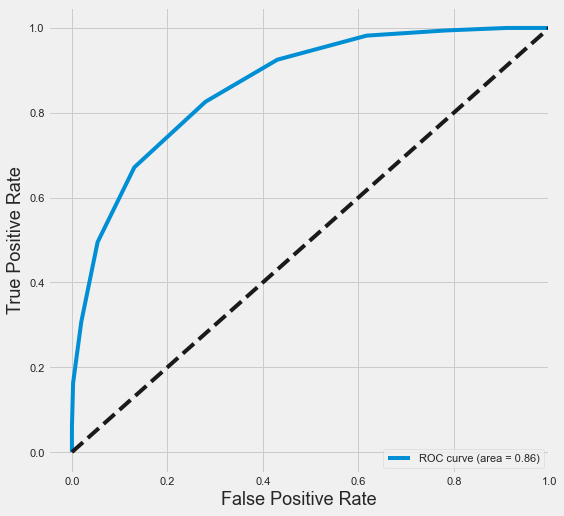

In [43]:
fpr, tpr, _ = roc_curve(y_test, probaC[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

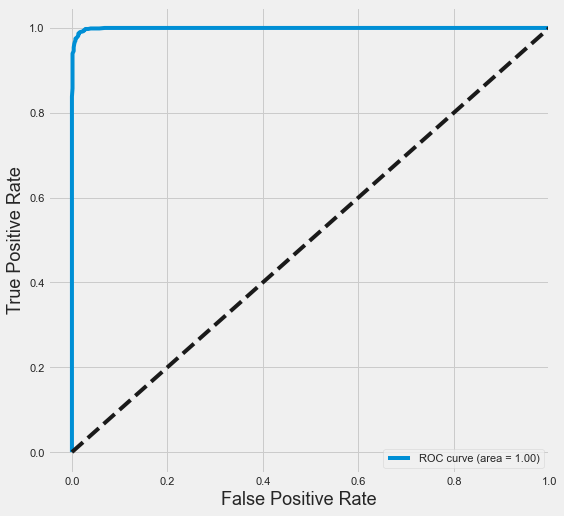

In [44]:
# Data leakage much 

fpr, tpr, _ = roc_curve(y_test, probae[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()